In [ ]:
from numpy import power, sin, cos, linspace, pi
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
pd.set_option("display.precision", 3)

In [ ]:
def graph_maker(point=None, a=None):
  A = -10
  B = 10
  numbers = linspace(A, B, 10000)
  fig, ax = plt.subplots(figsize = (10, 5))
  if point is not None:
    ax.scatter(point, function(point))
    ax.scatter(a, function(a), color='black')
    plt.annotate('x0', (a,  function(a)), textcoords="offset points", xytext=(10, 5), ha='center')

  ax.plot(numbers, function(numbers))
  ax.set_xlabel("x")
  ax.set_ylabel("f(x)")
  ax.set_title("Plot of the function")
  ax.grid(True)
  plt.show()

In [ ]:
# defining the function of interest and its first and second derivative
def function(x, derivative = False, second_derivative = False):
    if derivative == True:
      return  3 * power(x, 2) * cos(x) * sin(x) - power(x, 3) * sin(x) * sin(x) + power(x, 3) * cos(x) * cos(x) + 6 * x * sin(x)+ 3 * x * x * cos(x) - 3
    if second_derivative == True:
      return (-6 * x**2 * (sin(x))**2 + ((6 * x - 4 * x**3) * cos(x) - 3 * x**2 + 6) * sin(x) + 6 * x**2 * (cos(x))**2 + 12 * x * cos(x))
    return power(x, 3) * cos(x) * sin(x) + 3 * power(x, 2) * sin(x) - 3 * x

In [ ]:
def linear_convergance(x_previous, x_current, x_next, order=1):
  return abs((x_next - x_current)) / power(abs(x_current - x_previous), order)

In [ ]:
from math import log
def digit_agreement(x_previous, x_current, x_next):
  return -log(abs(x_next - x_current)) + log(abs(x_current - x_previous))

In [ ]:
def newton_method(x_0, eps):

  # creating a dataframe so that we can keep track of the variables
  df = pd.DataFrame(columns=["iteration", "x", "f(x)", "f'(x)", "f''(x)", "convergance_rate"])
  # variable initilization
  c = None
  x_previous = None
  x_current = x_0
  x_next = None
  iteration = 0

  # actual algorithm
  # if the first derivative of x becomes smaller than epsilon, the while block will stop
  while abs(function(x_current, derivative=True)) >= eps:

    # starting the track
    if iteration == 0:
      df.loc[iteration] = [iteration, x_current, function(x_current), function(x_current, derivative=True), function(x_current, second_derivative=True), None]

    # updating x
    x_next = x_current - (function(x_current, derivative=True) / function(x_current, second_derivative=True))

    # managing the dataframe
    if (x_previous is not None) and (x_next is not None):
      c = linear_convergance(x_previous, x_current, x_next, 2)
    x_previous = x_current
    df.loc[iteration] = [iteration, x_current, function(x_current), function(x_current, derivative=True), function(x_current, second_derivative=True), c]
    iteration += 1
    x_current = x_next

  # updating the dataframe
  c = linear_convergance(x_previous, x_current, x_next, 2)
  df.loc[iteration] = [iteration, x_current, function(x_current), function(x_current, derivative=True), function(x_current, second_derivative=True), c]

  return df, x_current

In [ ]:
def pipeline(x_0, eps):
  df, point = newton_method(x_0, eps)
  graph_maker(point, x_0)
  df["iteration"] = df["iteration"].astype(int)
  return df

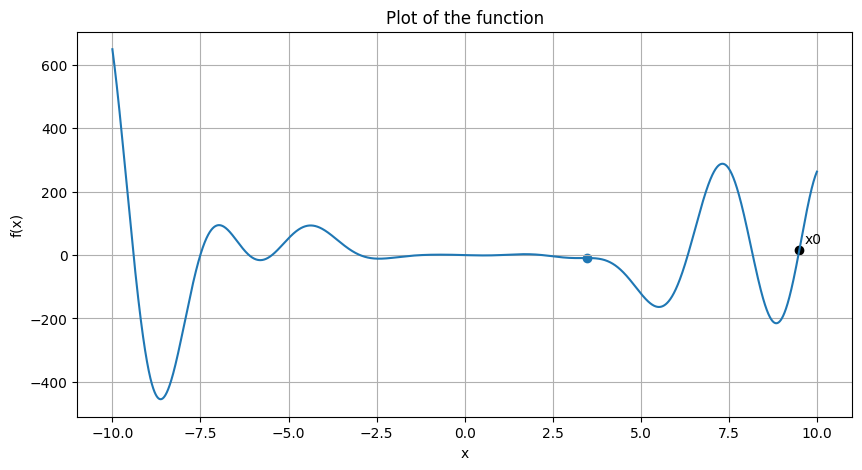

,iteration,x,f(x),f'(x),f''(x),convergance_rate
0,0,9.500,15.403,590.712,188.872,NaN
1,1,6.372,14.706,387.218,217.143,0.182
2,2,4.589,-64.682,-124.116,-116.361,0.335
3,3,3.523,-9.322,-0.942,-26.811,0.031
4,4,3.487,-9.304,-0.116,-20.265,4.640
5,5,3.482,-9.304,-0.003,-19.232,0.000


In [ ]:
pipeline(9.5, 1e-1)

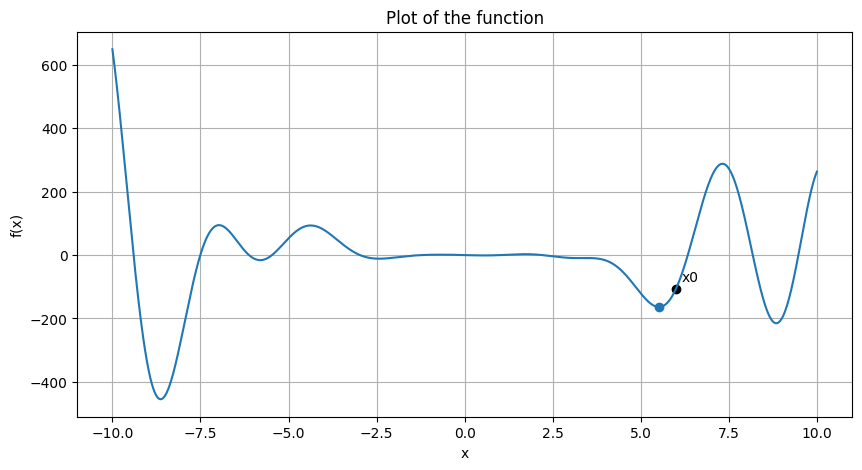

,iteration,x,f(x),f'(x),f''(x),convergance_rate
0,0,6.0000,-106.1267,243.9370,502.0463,NaN
1,1,5.5141,-163.7653,-0.5751,431.3741,0.0056
2,2,5.5154,-163.7657,0.0005,432.0954,0.0000


In [ ]:
pipeline(6, 1e-2)

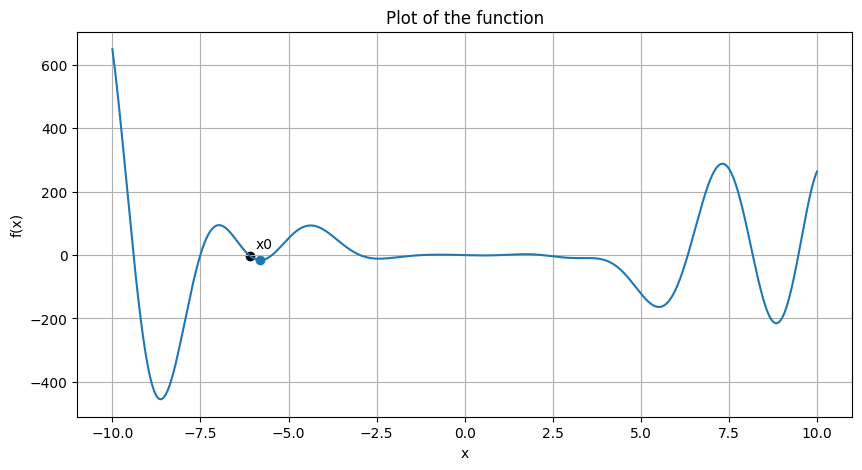

,iteration,x,f(x),f'(x),f''(x),convergance_rate
0,0,-6.1000,-2.0208,-9.1827e+01,273.2929,NaN
1,1,-5.7640,-15.7506,1.2105e+01,309.7484,0.3461
2,2,-5.8031,-15.9853,-1.3338e-01,316.1534,0.2762
3,3,-5.8027,-15.9853,-1.1705e-05,316.0979,0.0000


In [ ]:
pipeline(-6.1, 1e-3)

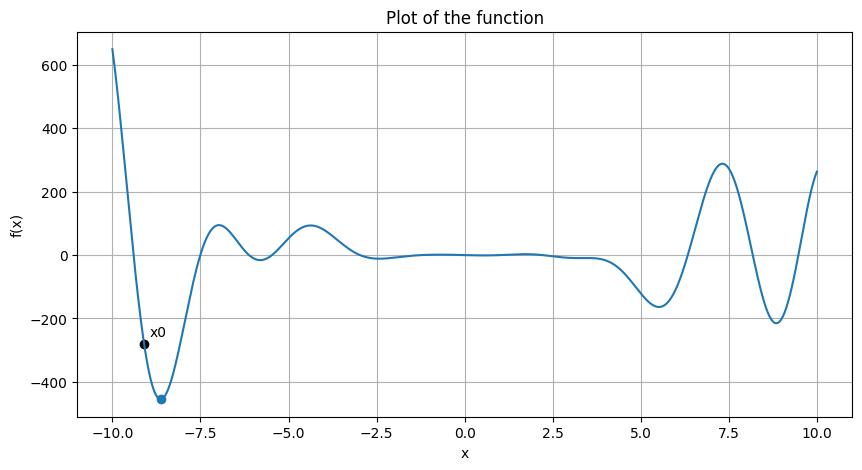

,iteration,x,f(x),f'(x),f''(x),convergance_rate
0,0,-9.1000,-279.8658,-7.4600e+02,1471.5829,NaN
1,1,-8.5931,-453.8440,5.4865e+01,1425.6960,0.1497
2,2,-8.6315,-454.8857,-1.0816e+00,1480.7795,0.4932
3,3,-8.6308,-454.8861,-3.5838e-04,1479.7978,0.4539
4,4,-8.6308,-454.8861,-3.9478e-11,1479.7975,0.0000


In [ ]:
pipeline(-9.1, 1e-4)